In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc 

In [2]:
X = pd.read_csv('CC GENERAL (1).csv') 

In [3]:
X = X.drop('CUST_ID', axis = 1) 


In [4]:
X.bfill(inplace=True)


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [6]:
X_normalized = normalize(X_scaled) 


In [7]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2'] 


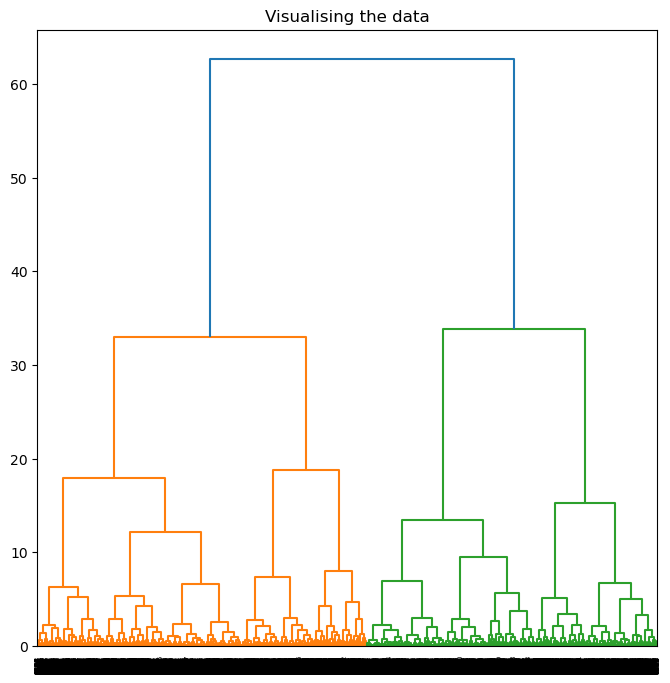

In [8]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

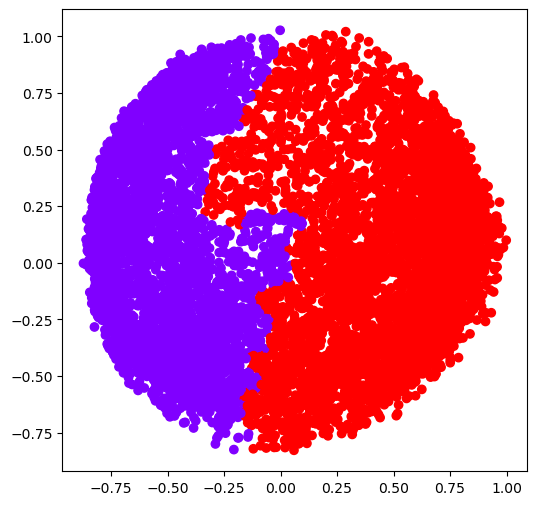

In [9]:
ac2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show() 

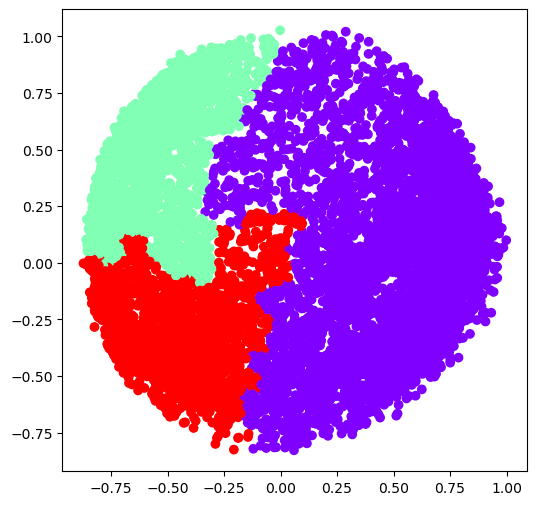

In [30]:
ac3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show() 

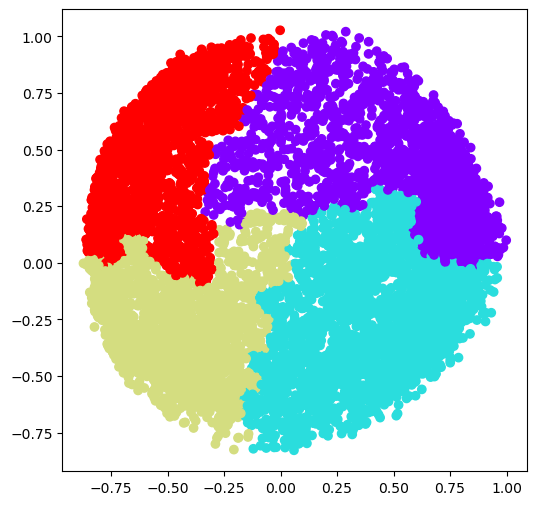

In [31]:
ac4 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show() 

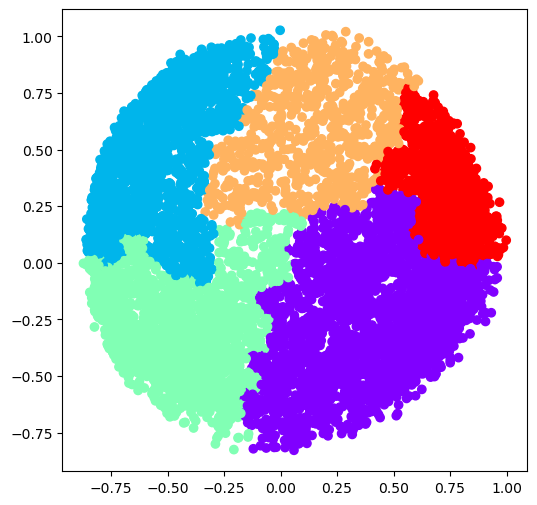

In [33]:
ac5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show() 

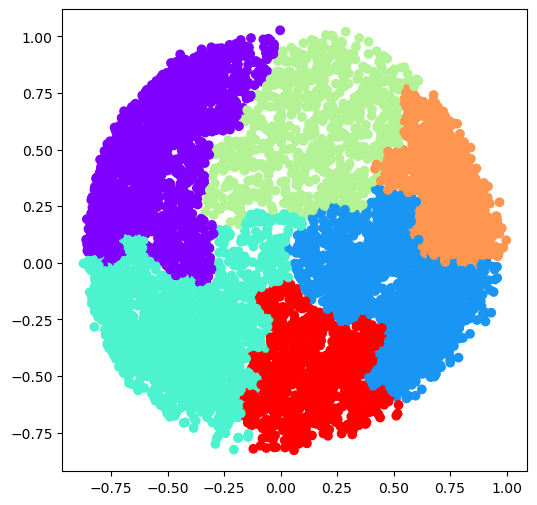

In [35]:
ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show() 

In [37]:
k = [2, 3, 4, 5, 6] 


In [38]:
silhouette_scores = []
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac6.fit_predict(X_principal)))

print(silhouette_scores)

[0.33251836620670594, 0.39032466287384565, 0.37929638043112374, 0.35609973949948065, 0.33251836620670594]


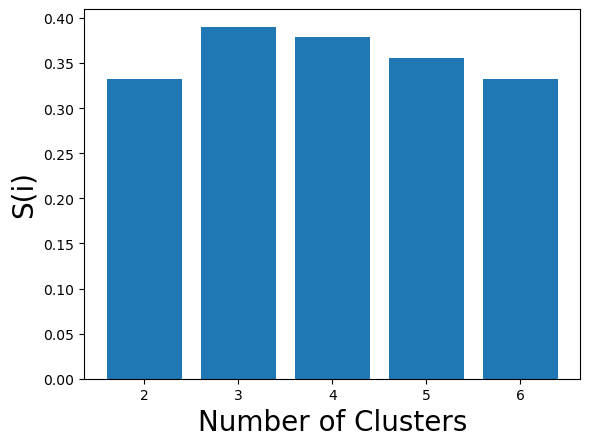

In [43]:
plt.bar(k,silhouette_scores)
plt.xlabel('Number of Clusters', fontsize = 20)
plt.ylabel('S(i)',fontsize = 20)
plt.show() 